# 6. 순환 신경망

## 6-1. 순차 데이터와 순환 신경망

### 1) 순차 데이터란?

**순서가 중요한 데이터**를 뜻한다.

- 텍스트 데이터
- 시계열 데이터

가 대표적인 바로 그 예인데, 여기서는 텍스트 데이터를 예시로 들어보려한다.

### 2) 순환 신경망



(사진 첨부가 안 되어서, 글로만 설명)

> 이전 합성곱 신경망에서, 각 뉴런에 **순환 고리**가 생겼다고 생각하면 된다. <br>
즉, 스스로를 참조하는 화살표가 있음을 확인 할 수 있다.

ex) A,B,C 데이터가 있다고 했을 때, A가 먼저 뉴런에 들어간다. 이로 인해 출력값인 Oa가 생성되고, 이 Oa가 B를 처리할 때 재사용 된다.

이전에는 **출력하고나면 다시 사용하지 않았는데, 여기서는 다시 사용까지 한다는게 차이점**이다.

즉, **순환 신경망은 앞의 샘플의 출력을 다시 사용해서 B를 계산할 때 다시 사용**한다.

그래서 Ob는 어느 정도 Oa에 대한 일부 정보를 담고 있을 가능성이 있다.

다음으로 C를 처리할 때에는 Ob를 다시 재사용해서 Oc를 계산한다.

> 이처럼 순환 신경망에서 하나의 샘플을 처리하는 하나의 단계를 **타임스텝**이라고 칭한다.



순환 신경망에서는 셀이 순환층이라는 용어와 동일하게 취급된다.

 앞에서 출력한 정보를 기억하고 있다는 의미로 셀이라는 표현을 많이 사용한다.

셀에서 출력한 값을 **은닉상태**라고 말한다.

신경망 층에서 출력되는 값이라고 이해하면 된다.

보통은 **활성화함수로 tanh함수**를 자주 사용한다.

참고로, '시그모이드'와 혼용해서 부르는 경우가 있다.

 tanh함수도 S모양이라고 시그모이드라고 부르는 경우가 있는데, 그래서 로지스틱 함수를 의미하는 것인지, tanh함수를 의미하는 것인지 헷갈릴 수는 있다.

 순환 신경망에서는 tanh를 의미한다.

시그모이드 : 0~1

tanh : -1 ~ 1

(범위가 다름!)

### 3) 타임스텝으로 펼친 신경망


합성곱신경망의 경우는 가중치가 입력에 모두 곱해지지 않았는데 (일부에만 곱해짐), 순환 신경망의 경우에도 입력에 가중치를 곱하나, **이전 샘플의 은닉상태, 즉 Wh도 함께 곱해진다.**

이렇게 새로운 은닉상태를 만든다.

이런 그림을 **타입스텝으로 펼친다**라는 표현을 사용한다.

이 그림에서 중요한 건 **가중치 Wx가 샘플마다 동일하게 사용**된다는 점이다. -> 타임스텝에 걸쳐 가중치를 공유한다.

### 4) 순환 신경망의 가중치

입력층, 순환층이 있을 때 **각각의 뉴런들은 완전 연결**된다. (완전연결신경망의 경우와 같다.)

4개의 입력, 3개의 출력이 있다면 12개의 가중치가 있겠다.

> **이 순환층은 출력 h가 있고 이게 다시 가중치와 곱해진다.** <br> 이 가중치가 순환층의 모든 뉴런에게도 완전 연결된다.

ex) r1의 출력 h가 다른 뉴런에도 완전 연결된다.

순환층의 은닉 상태는 다시 순환층으로 완결 연결된다.

그리는게 너무 복잡해서 보통은 단순하게 그린다.. 대신 연결 방식은 밀집층의 경우와 동일하게 완전연결된다는 점만 기억해두면 좋겠다.

### 5) 순환 신경망의 입력

ex) I am a boy라는 글자가 있다고 해보자. (텍스트 데이터에서는 **토큰**이라는 표현도 사용한다) <br>
이 글자 데이터는 여러 개의 정수값, 실수값으로도 표현 가능하다.

여기서는 단어 한 개당 3개의 원소를 가진 벡터로 표현해보려 한다. 여기서는 (1,4,3)이라고 볼 수 있다.

샘플 1개, 타임스텝 4, 차원 3 이라는 뜻이다.

> 이 샘플이 순환층을 통과하게 되면, **순환층의 뉴런의 개수만큼 출력**이 만들어진다. <br> 즉, 셀에 있는 뉴런의 개수만큼 출력됨.

### 6) 다층 순환 신경망

타임스텝을 여러 번 돌렸는데 출력이 2차원 텐서라는 건 타임스텝 정보가 사라졌다는 걸 의미한다.

>순환층 셀에서 출력될 때 **마지막 타임스텝의 은닉상태를 보통 출력**한다.

만약 순환신경망을 2개 이상 쌓는다면?

>마지막 셀의 타임스텝의 은닉상태만 출력해야하니까,** 첫 번째 셀은 마지막 은닉상태 뿐만 아니라 모든 타임스텝의 은닉상태를 출력**해야한다.

3차원 텐서의 크기는.. **(샘플, 타임스텝, 이전층 셀에 있는 뉴런 개수)**



### 7) 순환 신경망을 사용한 예측

(샘플, 타임스텝, 단어의 표현) 이렇게 전달받은 이 샘플을 은닉층의 셀이 처리하게 되면 (여기서는 순환층을 1개 사용했다고 가정하고) 마지막 은닉상태만을 출력한다. 셀의 뉴런이 10개라면 (10,10) 벡터의 텐서를 출력한다고 보면 된다.

> 분류 문제의 경우에는 분류하려는 클래스 만큼 Dense층을 만들어낸다.

여기서는 3개의 클래스가 있다고 가정했다.(교재 참고)

> 순환층을 1개 이상 쓰면 순환 신경망을 쓴다고 사용한다.

## 6-2. 순환 신경망으로 IMDB 리뷰 분류하기

### 1) IMDB 리뷰 데이터셋

텍스트 데이터로 예제를 만들 때 많이 사용하는 데이터.

IMDB : 인터넷 무비 데이터 베이스 (평점 사이트)

리뷰 텍스트를 보고 좋게 평가하는지 나쁘게 평가하는지 (감성분석, 감정분석)을 진행한다.

새로운 용어..

- NLP
- 말뭉치 (NLP의 데이터셋)
- 토큰 (공백을 기준으로 잘라서 사용, 하나의 단어를 토큰이라고 함)
- 어휘 사전 (토큰의 집합, 겹치는 것 X)
ex ) he follows the cat. he loves the cat

이라는 예문 2개가 있을 때, He는 이미 어휘 목록에 있으니 다시 추가할 필요가 없다.

그래서 어휘 목록에는 [ he follows the cat loves ]가 들어가게 된다.

단어를.. 그대로 신경망에 주입하기는 어렵다. 모든 데이터가 숫자로 표현되어야 한다.

이전에 이미지 했을 때도 픽셀값으로 사용 한 것 처럼..

가장 간단한 건 고유의 단어에 임의의 번호를 붙이는 것.

케라스에는 영어문장을 이미 영어로 바꾸어져있다!

### 2) 케라스로 IMDB 데이터 불러오기

In [27]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)
# (25000,) (25000,)

print(train_input[0])
#[1, 14, 22, 16, 43, 2, ...]
# 1은 특별히 예약된 정수, 문장의 시작부분을 나타낼 때 보통 1을 지정한다.
# 2번째로 예약된 정수는 2인데, num_words = 500으로 했기 때문에, 500개의 단어에 포함되지 않은 단어들.
#5번째 단어부터 포함되지 않은 단어들이 있음을 확인할 수 있다. (빈 숫자를 2로 채운다.)
# num_words가 클 수록 2가 나오는 경우는 적어질 것이다.

print(train_target[:20])
#[1 0 0 1 0 0 1 0 1 0 1 ... ]
# 넘파이 배열로 파이썬 리스트를 담는다. 각각 리뷰마다 길이가 모두 다르기 때문에 2차원 배열 넘파이 배열로는 이를 표현할 수 없다. 바깥쪽은 넘파이 배열, 안 쪽은 파이썬 리스트.
# 긍정적이냐 부정적이냐를 기준으로, (이진분류) 긍정적일때는 1, 부정적일때에는 0으로 타깃 데이터가 준비됨



(25000,) (25000,)
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 3) 훈련 세트 준비

239.00925 178.0


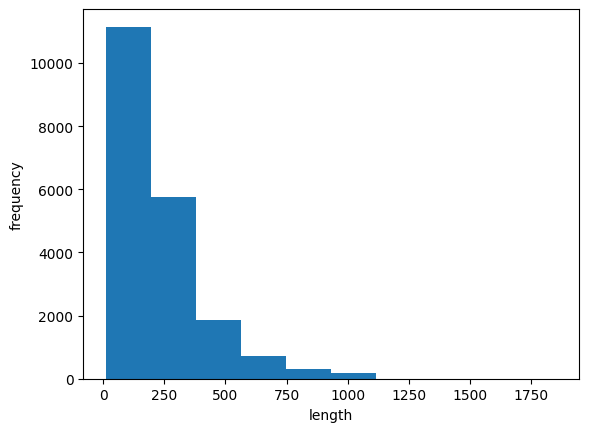

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)
#20퍼센트를 검증세트로 분류

lengths = np.array([len(x) for x in train_input])
# 샘플들을 모두 순회하며 파이썬 리스트의 길이를 계산한다.
# lengths 배열의 평균값을 재어보면 239정도 된다. 즉, 단어 개수 평균이 239, 중간값은 178

print(np.mean(lengths), np.median(lengths))
#239.00925 178.0

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

### 4) 시퀀스 패딩

문장의 길이를, 7 토큰을 사용한다고 했을 때, I love you의 경우 3개의 토큰만을 사용한다. 나머지 4개의 토큰은 비워져 있을 수 밖에 없다.

합성곱신경망의 경우처럼 0으로 비워진 자리를 채우는 패딩으로써 사용할 수 있다. (0은 패딩으로 사용되는 예약어)

만약 길이가 더 길다면 잘라내고, 길이가 더 짧다면 빈 공간을 0으로 채워주는 작업을 하려 한다.

for 루프를 돌릴 수도 있겠지만.. 케라스에 이미 있다. pad_sequences라는 함수가 있음! 이걸로 빈 자리를 채울 수 있다. maxlen = 100으로 잡아보았다.

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

print(train_seq.shape)
#(20000, 100)
#이제 넘파이 2차원 배열로 표현됨.

print(train_seq[0])
# [ 10 4 ... 158]

print(train_input[0][-10:])
#[6, 2, 46 ... 158]
# 마지막 10개를 출력해보면 train_seq의 뒷부분과 같음. 이 문장은 100개 토큰보다 긴 문장일 것. (0이 없으니까)
# 일반적으로 pad_sequences는 maxlen의 앞부분을 자른다. 문장의 뒷부분이 더 의미잇을 수 있다고 가정했기 떄문

print(train_seq[5])
# [ 0 0 0.... 2]
# 앞부분이 0으로 패딩되었음을 확인할 수 있음. 토큰의 개수가 100개보다 모자라서 앞에 0으로 패딩 된 것.

val_seq = pad_sequences(val_input, maxlen=100)
# 검증세트도 똑같이!

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]
[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


### 5) 순환 신경망 모델 만들기

In [30]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
# 순환층을 만들 때, SimpleRNN 클래스를 사용한다.
# 덴스층을 만들때와 유사, 첫 번째 : 뉴런의 개수 지정, input_shape의 크기 지정. (100개의 토큰이 들어오고, 두 번째 차원은 500인데, 500은 좀 이따가..)

model.add(keras.layers.Dense(1, activation='sigmoid'))
# 이진 분류이므로 Dense 층을 두어야 한다.
# 순환층이 1개 있는 간단한 모델

### 6) 원-핫 인코딩

단어를 10, 15, 9... 이런 식으로 정수로 표현하다 보면, 정수 사이의 대소 관계 간 의미가 없다는 건 알지만, 컴퓨터가 데이터를 처리할 때에는 숫자값에 의미가 부여된다.

이런식으로 처리하게 되면.. 의도치 않게 love의 값이 너무 커진다.

이처럼 무의미한 방식으로 인코딩하는 방식이 원-핫 인코딩이다. 여기서는 500개의 단어를 준비했기 때문에, 500개의 벡터로 이루어진인코딩을 만들어주어야한다.

(어느 위치만 1이고, 나머지는 다 0으로)

In [31]:
train_oh = keras.utils.to_categorical(train_seq)

print(train_oh.shape)
#(20000, 100, 500)
# 500개의 단어를 사용했기 때문에 500개의 차원으로 원-핫 인코딩이 됨.

print(train_oh[0][0][:12])
# 첫 번째 샘플의 첫 번 째 토큰의, 처음 12개를 출력

print(np.sum(train_oh[0][0]))

val_oh = keras.utils.to_categorical(val_seq)
#검증 세트도 똑같이



(20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


### 7) 모델 구조 확인

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



RNN층과 Dense층이 추가된 것을 확인할 수 있음.

뉴런 개수가 8개니까 RNN은 8개, 뉴런 개수가 1개니까 Dense층은 1개의 출력. Parma 을 보면 8x1 + 1(절편) 을 통해 9개의 파라미터가 존재함을 알 수 있다.

RNN의 경우에는 500x8(500개의 샘플, 8개의 뉴런이 완전 연결) 뿐만 아니라 순환되는 값(출력값)이 있기 때문에, +8개(뉴런 개수만큼), 순환 될 때 완전 연결이 되도록 순환되기 때문에, 8x8개의 가중치, 그리고 8개의 절편이 더해진다.

In [ ]:

rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
#이진 분류이므로 binary_crossentropy 사용
#정확도까지 출력하기 위해 metrics를 accuracy

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
#조기종료

history = model.fit(train_oh, train_target, epochs=100, batch_size = 64, validation_data=(val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])



### 8) 임베딩


이전 원핫인코딩으로 입력 데이터를 준비했는데, 20000개의 샘플, 100개의 토큰, 토큰마다의 500개의 원핫인코딩 배열이 있었다.

즉, 입력 데이터 크기가 엄청 크다..

이런 경우 늘어날때마다 차원의 개수가 급격히 늘어나게 된다.

원핫 인코딩의 단점은 각각의 토큰의 서로의 관계, 유사도를 무시한다는 점이다.

이에 대비해 텍스트 처리에서 높은 성능을 보여주는게 임베딩 방법이다.

원핫 인코딩이 아니라, 임베딩은 지정된 갯수의 실수 벡터로 변환하는 방법이다. ex) cat이면 0.2, 0.1, 1.3 ... 이 처럼 실수값으로 채우는 것이다.

이 임베딩 방법도 케라스에서 클래스를 제공한다.

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 500개의 어휘 사전, 출력 차원을 16으로 둠. (16개의 벡터로 토큰 하나를 출력) 그래서 SimpleRNN에서 처리하는 벡터의 개수를 훨씬 줄일 수 있다.
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()
# 결과를 보면 100개의 토큰, 출력된 값은 16개로 지정했기 때문에 16개의 실수 벡터로 출력이 된다.
#파라미터는 8000개인데, 샘플 개수가 500개이기 때문에, 500x16개의 가중치 = 8000

#SimpleRNN의 가중치를 계산해보면 16x(이전층의 출력값)x8(뉴런개수) + 8x8(순환) + 8(절편)

#마지막 Dense층은 이전과 동일, 8 + 1 = 9

## 6-3. LSTM과 GRU 셀

### 1) LSTM 셀

### 2) LSTM 신경망

In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
#SimpleRNN을 LSTM으로 변경
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


lstm 층을 보면 이전처럼 8개의 모델을 사용함을 확인할 수 있다.


> lstm층의 `Param` 설명 : **16(입력)x8(뉴런)+8(LSTM셀의 순환되는 셀)x8(은닉상태의 셀 순환) + 8 (절편)**

을 한 후, 이런 **작은 셀이 4개가 있으니까 전체에 곱하기 4**를 해준다. 따라서 800개의 가중치가 있는 것을 확인할 수 있다.

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 57s 44ms/step - loss: 0.4064 - accuracy: 0.8152 - val_loss: 0.4326 - val_accuracy: 0.7972
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4059 - accuracy: 0.8135 - val_loss: 0.4340 - val_accuracy: 0.7984
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4058 - accuracy: 0.8141 - val_loss: 0.4326 - val_accuracy: 0.8004
Epoch 4/100
313/313 [==============================] - 15s 48ms/step - loss: 0.4054 - accuracy: 0.8142 - val_loss: 0.4324 - val_accuracy: 0.7970
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4052 - accuracy: 0.8164 - val_loss: 0.4326 - val_accuracy: 0.7956
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4049 - accuracy: 0.8140 - val_loss: 0.4318 - val_accuracy: 0.8004
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.4045 - accuracy: 0.8156 - val_loss: 0.4328 - val_ac

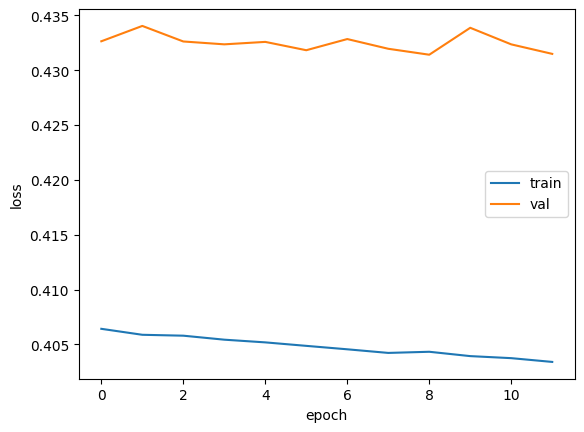

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 3) 드롭아웃 적용하기

In [15]:
#순환 신경망의 경우, 드롭아웃층을 따로 추가하지 않고 매개변수로 지정할 수 있다.

model2 = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
#dropout : 은닉상태의 드롭아웃 비율 지정
# 순환되는 셀 상태의 드롭아웃 비율은 따로 지정해주어야함.
model2.add(keras.layers.Dense(1, activation='sigmoid'))

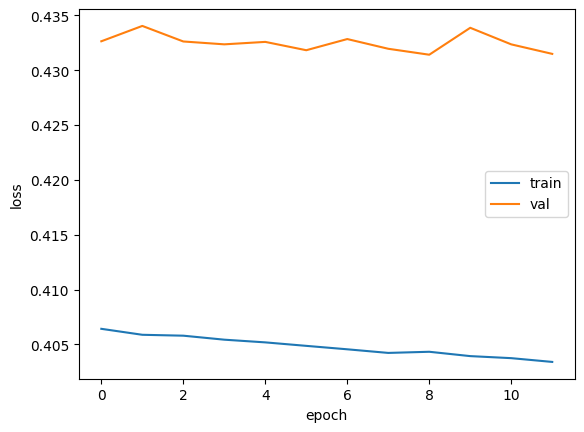

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 4) 2개의 층을 연결하기

In [20]:

#마지막 셀이 아닌 이상, 그 앞에 있는 순환층들은 모든 타임스텝의 은닉상태를 모두 출력해야한다.
#이를 return_sequenes=True로 두어 매 타임스텝마다 은닉상태까지 출력한다.

model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
#2개의 층을 만듦.
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


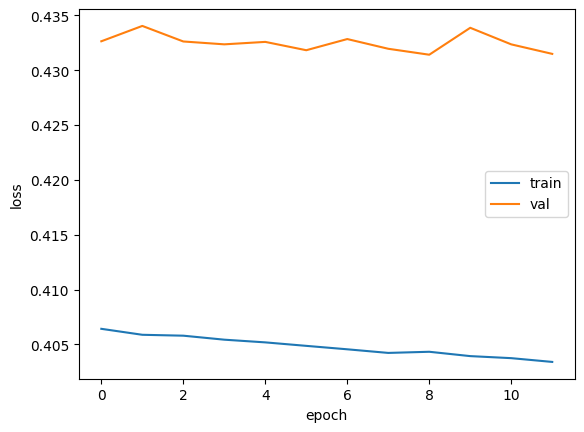

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 5) GRU 셀

### 6) GRU 신경망 훈련하기

In [23]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



GRU층의 Param 개수 계산

> 16(입력)x8(뉴런) + 8x8(은닉상태에 곱해지는 가중치) + 8(절편) = 200, 여기에 8을 더함 (8개의 뉴런마다 8개의 가중치가 더 필요)
208개에 x3을 하면 624

작은 뉴런마다 절편이 하나씩 더 추가된다는 점을 잊지 말 것.

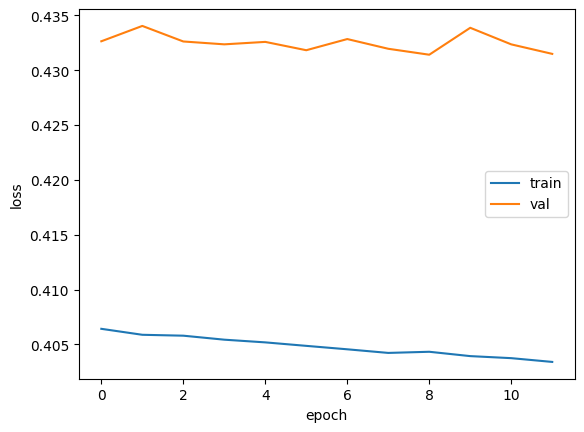

In [25]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()